In [1]:
using JLD
using PyPlot
using Statistics
using StatsBase 
using LinearAlgebra

In [2]:
using JLD2
using FileIO

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [4]:
data = load("../data/experiment/images.jld")

Dict{String, Any} with 5 entries:
  "ImagesIS2"   => [0 0 … 0 0; 0 0 … 0 0; … ; 43 33 … 35 15; 23 140 … 44 28]…
  "ImagesBTV50" => [10 3 … 0 0; 3 0 … 0 0; … ; 6 0 … 0 0; 4 0 … 0 0]…
  "charge"      => [0.1298, 0.1712, 0.095, 0.0433, 0.097, 0.136, 0.1404, 0.1837…
  "ImagesBTV26" => [81 24 … 14 0; 70 49 … 37 0; … ; 38 54 … 23 3; 69 22 … 23 4]…
  "ImagesBTV53" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 21 0; 0 0 … 0 0]…

In [5]:
cam_1 = Float64.(data["ImagesBTV50"])
cam_2 = Float64.(data["ImagesBTV53"])
cam_3  = Float64.(data["ImagesBTV26"])
cam_4 = Float64.(data["ImagesIS2"])
charge  = Float64.(data["charge"])

enumerate_events = collect(1:length(charge));

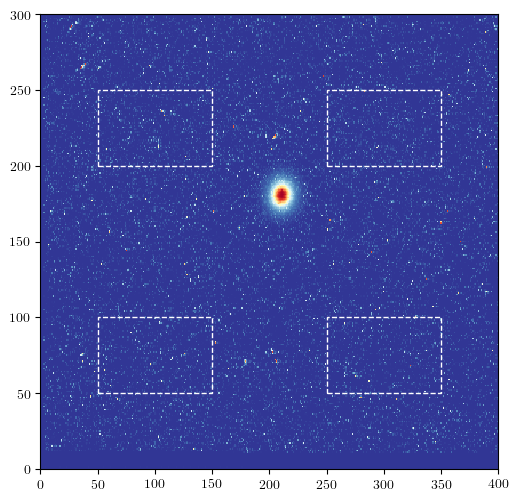

PyObject <matplotlib.patches.Rectangle object at 0x7f4b6b317dc0>

In [26]:
fig, ax = plt.subplots(1,1, figsize=(5.905631659056317, 5.905631659056317))

fig.subplots_adjust(hspace=0.1, wspace=0.05)

ev_number = 200

ax.pcolormesh(collect(0:400), collect(0:300),  cam_1[ev_number,:,:], cmap="RdYlBu_r")

rect_1 = (x1=50, x2=150, y1 = 200, y2 = 250)
rect_2 = (x1=250, x2=350, y1 = 200, y2 = 250)
rect_3 = (x1=50, x2=150, y1 = 50, y2 = 100)
rect_4 = (x1=250, x2=350, y1 = 50, y2 = 100)

proxy = plt.Rectangle((rect_1.x1, rect_1.y1), rect_1.x2 - rect_1.x1, rect_1.y2 - rect_1.y1, fc = "None", ec=:white, ls=:dashed, lw=1)
ax.add_patch(proxy)

proxy = plt.Rectangle((rect_2.x1, rect_2.y1), rect_2.x2 - rect_2.x1, rect_2.y2 - rect_2.y1, fc = "None", ec=:white, ls=:dashed, lw=1)
ax.add_patch(proxy)

proxy = plt.Rectangle((rect_3.x1, rect_3.y1), rect_3.x2 - rect_3.x1, rect_3.y2 - rect_3.y1, fc = "None", ec=:white, ls=:dashed, lw=1)
ax.add_patch(proxy)

proxy = plt.Rectangle((rect_4.x1, rect_4.y1), rect_4.x2 - rect_4.x1, rect_4.y2 - rect_4.y1, fc = "None", ec=:white, ls=:dashed, lw=1)
ax.add_patch(proxy)

In [32]:
event_mask = charge .> 15.;

In [33]:
data_temp = cam_1[event_mask,:,:]
pixel_mask = falses(size(data_temp))
pixel_mask[:,rect_1.y1:rect_1.y2,rect_1.x1:rect_1.x2] .= true;

bins = 0:1:4096
histogram_1 = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_1 = normalize(histogram_1, mode=:probability);

In [34]:
data_temp = cam_1[event_mask,:,:]
pixel_mask = falses(size(data_temp))
pixel_mask[:,rect_2.y1:rect_2.y2,rect_2.x1:rect_2.x2] .= true;

bins = 0:1:4096
histogram_2 = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_2 = normalize(histogram_2, mode=:probability);

In [35]:
data_temp = cam_1[event_mask,:,:]
pixel_mask = falses(size(data_temp))
pixel_mask[:,rect_3.y1:rect_3.y2,rect_3.x1:rect_3.x2] .= true;

bins = 0:1:4096
histogram_3 = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_3 = normalize(histogram_3, mode=:probability);

In [36]:
data_temp = cam_1[event_mask,:,:]
pixel_mask = falses(size(data_temp))
pixel_mask[:,rect_4.y1:rect_4.y2,rect_4.x1:rect_4.x2] .= true;

bins = 0:1:4096
histogram_4 = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_4 = normalize(histogram_4, mode=:probability);

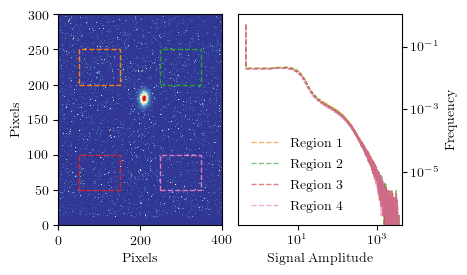

In [101]:

fig, ax = plt.subplots(1,2, figsize=(4.429223744292238, 2.737410817750676))

fig.subplots_adjust(hspace=0.1, wspace=0.1)

ev_number = 200

ax[1].pcolormesh(collect(0:400), collect(0:300),  cam_1[ev_number,:,:], cmap="RdYlBu_r", rasterized=true)

ax[2].step(midpoints(histogram_1.edges[1]), histogram_1.weights, lw=1.0, alpha=0.6, ls="dashed", color=:C1, label="Region 1")
ax[2].step(midpoints(histogram_2.edges[1]), histogram_2.weights, lw=1.0, alpha=0.6, ls="dashed", color=:C2, label="Region 2")
ax[2].step(midpoints(histogram_3.edges[1]), histogram_3.weights, lw=1.0, alpha=0.6, ls="dashed", color=:C3, label="Region 3")
ax[2].step(midpoints(histogram_4.edges[1]), histogram_4.weights, lw=1.0, alpha=0.6, ls="dashed", color=:C6, label="Region 4")


ax[2].set_xscale("log")
ax[2].set_yscale("log")

proxy = plt.Rectangle((rect_1.x1, rect_1.y1), rect_1.x2 - rect_1.x1, rect_1.y2 - rect_1.y1, fc = "None", ec=:C1, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((rect_2.x1, rect_2.y1), rect_2.x2 - rect_2.x1, rect_2.y2 - rect_2.y1, fc = "None", ec=:C2, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((rect_3.x1, rect_3.y1), rect_3.x2 - rect_3.x1, rect_3.y2 - rect_3.y1, fc = "None", ec=:C3, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((rect_4.x1, rect_4.y1), rect_4.x2 - rect_4.x1, rect_4.y2 - rect_4.y1, fc = "None", ec=:C6, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

ax[2].yaxis.set_label_position("right")
ax[2].yaxis.tick_right()

ax[1].set_ylabel("Pixels")
ax[1].set_xlabel("Pixels")

ax[2].set_ylabel("Frequency")
ax[2].set_xlabel("Signal Amplitude")

ax[2].legend(loc="lower left", ncol=1, framealpha=0.9, edgecolor=:white)

ax[2].set_xlim(0, 2^12)

# fig.savefig("../plots/backg-uniformality.pdf", bbox_inches = "tight")